<a href="https://www.kaggle.com/code/khawjaahmad/ml-for-test-case-prioritization-in-qa?scriptVersionId=246161451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Generating test case dataset...
Generated 2500 test cases

Dataset Overview:
Shape: (2500, 14)

Bug detection summary:
Total bugs found: 10807
Average bug detection rate: 0.174
Tests with bugs found: 2179

Analyzing test case patterns...


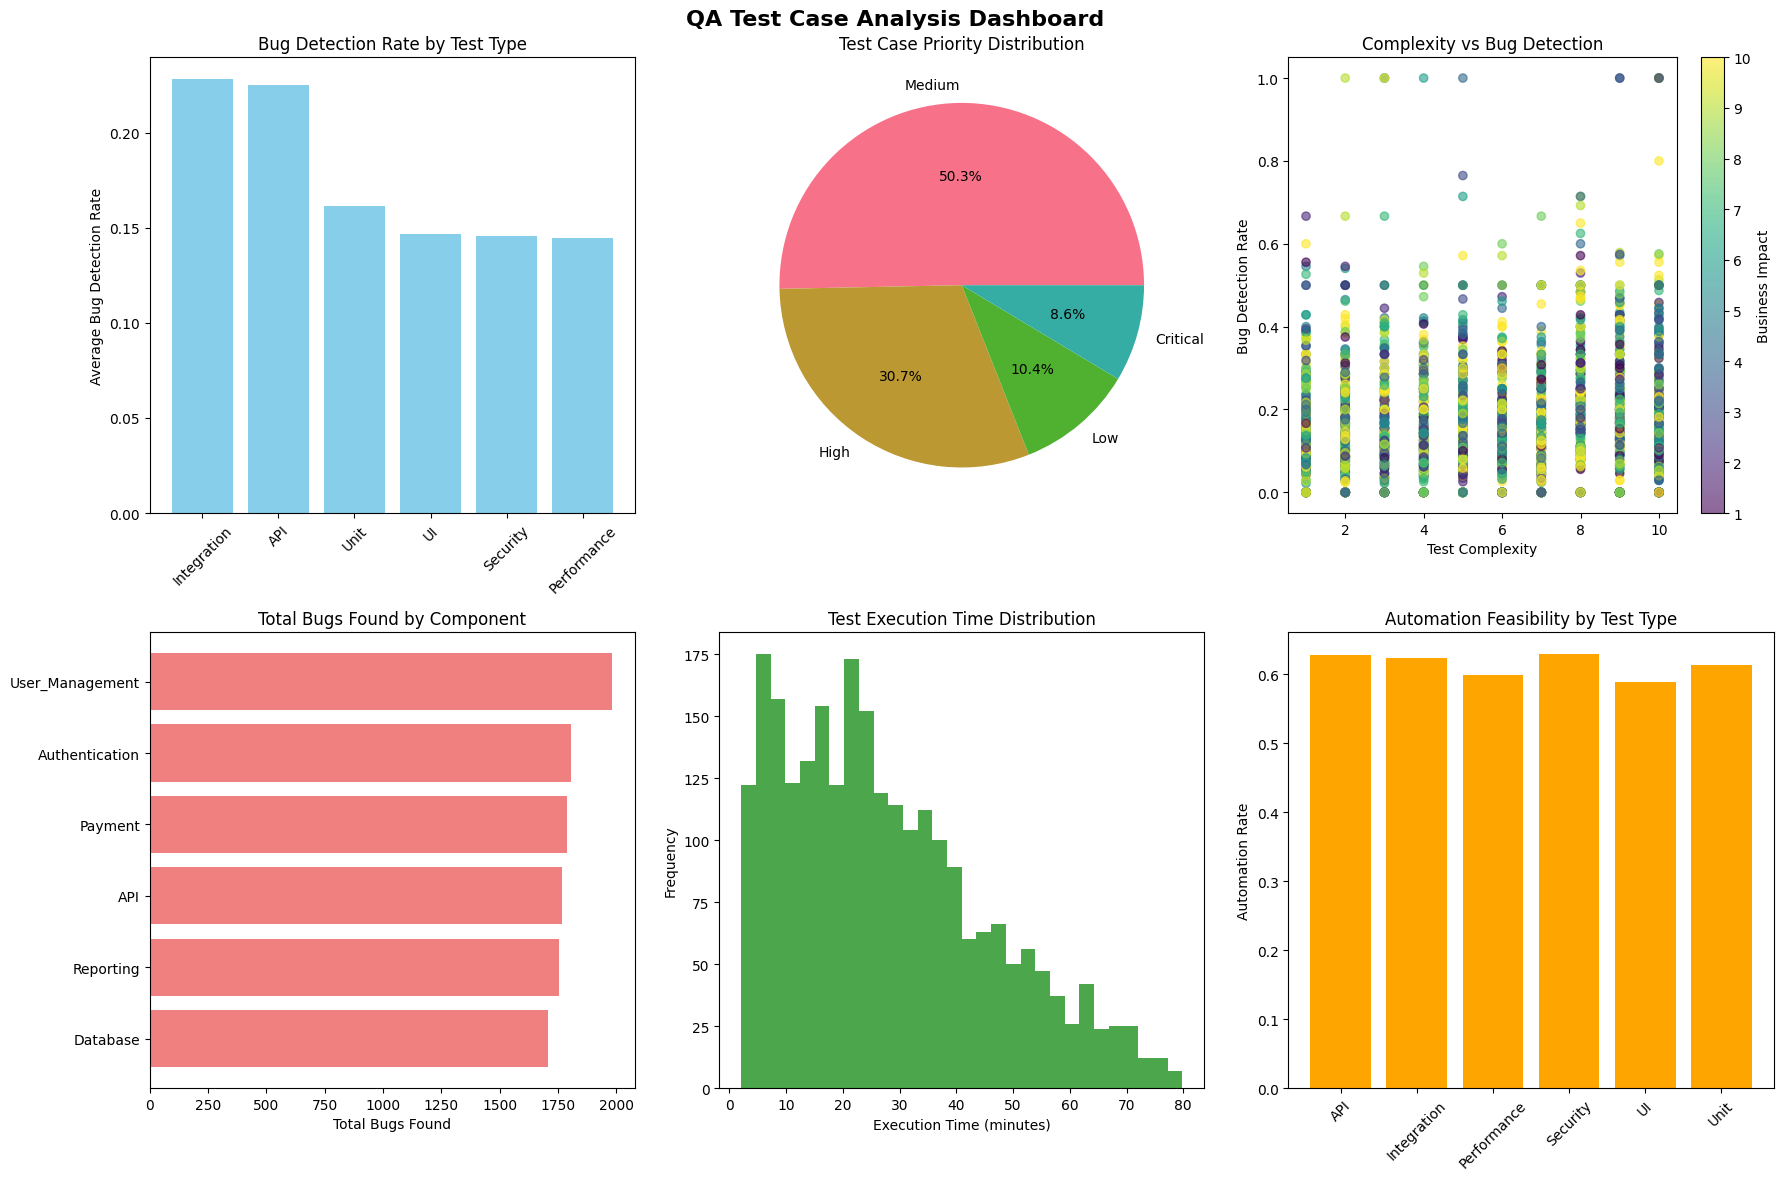


Key Insights:
Highest bug detection: Integration tests (0.228)
Most problematic component: User_Management (1982 bugs)
Average execution time: 27.7 minutes
Automation potential: 61.3% of tests

Building Test Case Prioritization Model...
High-value tests: 1445 (57.8%)

Model Performance:
Accuracy: 0.852

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       211
           1       0.89      0.85      0.87       289

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500


Feature Importance:
                    feature  importance
5           business_impact    0.528086
4        execution_time_min    0.118476
1          priority_encoded    0.076464
0         test_type_encoded    0.065119
3                complexity    0.062359
2         component_encoded    0.048064
6      requirements_covered    0.045508
7  

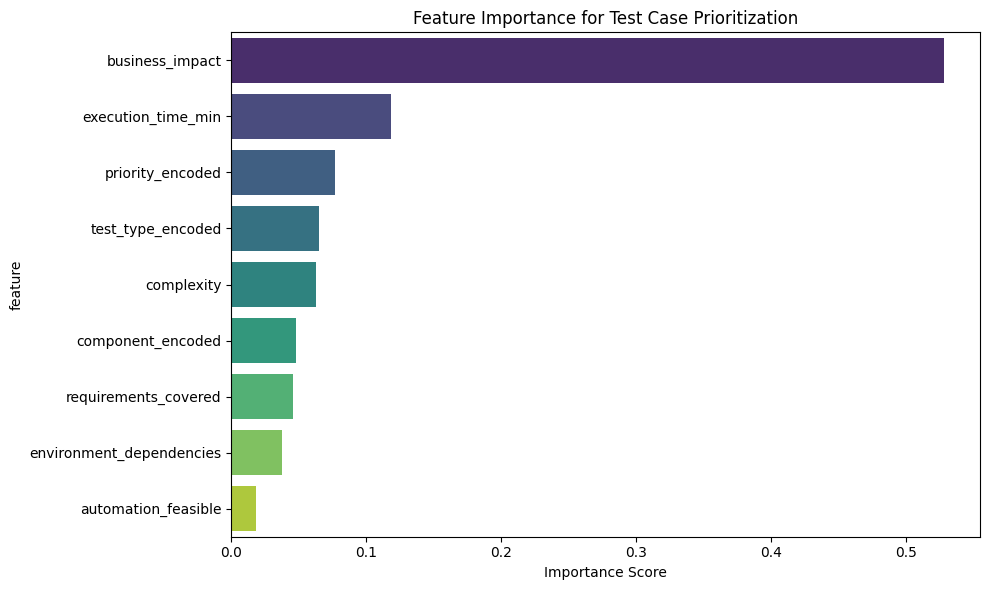


Building Smart Test Selection Engine...

Smart Test Selection Results:
Selected 9 tests out of 2500 total
Total execution time: 4.0 hours
Expected bug detection rate: 0.821
Average business impact: 9.00

Comparison with Random Selection:
Smart selection bug rate: 0.821
Random selection bug rate: 0.204
Improvement: 301.3%

Calculating ROI of Smart Test Selection...

ROI Analysis Results:
Smart Selection:
  Time: 4.0 hours
  Cost: $200
  Bugs found: 29
  Value created: $29,000
  ROI: 14419.4%

Full Testing (for comparison):
  Time: 1155.5 hours
  Cost: $57,773
  Bugs found: 10807

Efficiency Gains:
  Time saved: 99.7%
  Bug detection efficiency: 0.78x

Generating Actionable QA Recommendations...

QA Optimization Recommendations:

1. Automation (High Priority)
   Action: Automate top 10 frequently executed manual tests
   Impact: Save approximately 8 hours per test cycle
   Example tests: TC_1017, TC_0991, TC_0195

2. Maintenance (Medium Priority)
   Action: Review and update 1227 stale 

In [1]:
# A Data-Driven Approach to Software Testing Optimization

"""
INNOVATIVE QA AUTOMATION PROJECT

This notebook addresses a real problem in software testing:
- How to prioritize test cases when time is limited?
- Which tests are most likely to find bugs?
- How to optimize test coverage with minimal resources?

Using machine learning to revolutionize QA processes.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

def generate_test_cases(n_cases=2000):
    np.random.seed(42)
    
    test_types = ['Unit', 'Integration', 'API', 'UI', 'Performance', 'Security']
    priorities = ['Critical', 'High', 'Medium', 'Low']
    components = ['Authentication', 'Payment', 'User_Management', 'Reporting', 'API', 'Database']
    
    data = []
    
    for i in range(n_cases):
        test_type = np.random.choice(test_types)
        priority = np.random.choice(priorities, p=[0.1, 0.3, 0.5, 0.1])
        component = np.random.choice(components)
        
        complexity = np.random.randint(1, 11)
        execution_time = complexity * np.random.uniform(2, 8)
        
        bug_probability = 0.1
        if priority == 'Critical':
            bug_probability *= 2.5
        elif priority == 'High':
            bug_probability *= 1.8
        
        if test_type in ['Integration', 'API']:
            bug_probability *= 1.5
        
        if complexity > 7:
            bug_probability *= 1.3
            
        bug_probability = min(0.8, bug_probability * np.random.uniform(0.7, 1.3))
        
        times_executed = np.random.randint(1, 50)
        bugs_found = np.random.binomial(times_executed, bug_probability)
        
        bug_detection_rate = bugs_found / times_executed if times_executed > 0 else 0
        
        last_updated_days = np.random.randint(1, 365)
        automation_feasible = np.random.choice([0, 1], p=[0.4, 0.6])
        
        business_impact = np.random.randint(1, 11)
        if component in ['Payment', 'Authentication']:
            business_impact = min(10, business_impact + 3)
        
        data.append({
            'test_id': f'TC_{i:04d}',
            'test_type': test_type,
            'priority': priority,
            'component': component,
            'complexity': complexity,
            'execution_time_min': execution_time,
            'times_executed': times_executed,
            'bugs_found': bugs_found,
            'bug_detection_rate': bug_detection_rate,
            'last_updated_days': last_updated_days,
            'automation_feasible': automation_feasible,
            'business_impact': business_impact,
            'requirements_covered': np.random.randint(1, 6),
            'environment_dependencies': np.random.randint(0, 4)
        })
    
    return pd.DataFrame(data)

print("Generating test case dataset...")
df = generate_test_cases(2500)
print(f"Generated {len(df)} test cases")

print(f"\nDataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nBug detection summary:")
print(f"Total bugs found: {df['bugs_found'].sum()}")
print(f"Average bug detection rate: {df['bug_detection_rate'].mean():.3f}")
print(f"Tests with bugs found: {(df['bugs_found'] > 0).sum()}")

print("\nAnalyzing test case patterns...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('QA Test Case Analysis Dashboard', fontsize=16, fontweight='bold')

bug_rates = df.groupby('test_type')['bug_detection_rate'].mean().sort_values(ascending=False)
axes[0,0].bar(bug_rates.index, bug_rates.values, color='skyblue')
axes[0,0].set_title('Bug Detection Rate by Test Type')
axes[0,0].set_ylabel('Average Bug Detection Rate')
axes[0,0].tick_params(axis='x', rotation=45)

priority_counts = df['priority'].value_counts()
axes[0,1].pie(priority_counts.values, labels=priority_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Test Case Priority Distribution')

scatter = axes[0,2].scatter(df['complexity'], df['bug_detection_rate'], 
                           c=df['business_impact'], alpha=0.6, cmap='viridis')
axes[0,2].set_xlabel('Test Complexity')
axes[0,2].set_ylabel('Bug Detection Rate')
axes[0,2].set_title('Complexity vs Bug Detection')
plt.colorbar(scatter, ax=axes[0,2], label='Business Impact')

component_bugs = df.groupby('component')['bugs_found'].sum().sort_values(ascending=True)
axes[1,0].barh(component_bugs.index, component_bugs.values, color='lightcoral')
axes[1,0].set_title('Total Bugs Found by Component')
axes[1,0].set_xlabel('Total Bugs Found')

axes[1,1].hist(df['execution_time_min'], bins=30, alpha=0.7, color='green')
axes[1,1].set_xlabel('Execution Time (minutes)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Test Execution Time Distribution')

automation_by_type = df.groupby('test_type')['automation_feasible'].mean()
axes[1,2].bar(automation_by_type.index, automation_by_type.values, color='orange')
axes[1,2].set_title('Automation Feasibility by Test Type')
axes[1,2].set_ylabel('Automation Rate')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"Highest bug detection: {bug_rates.index[0]} tests ({bug_rates.iloc[0]:.3f})")
print(f"Most problematic component: {component_bugs.index[-1]} ({component_bugs.iloc[-1]} bugs)")
print(f"Average execution time: {df['execution_time_min'].mean():.1f} minutes")
print(f"Automation potential: {df['automation_feasible'].mean()*100:.1f}% of tests")

print("\nBuilding Test Case Prioritization Model...")

df['high_value_test'] = (
    (df['bug_detection_rate'] > df['bug_detection_rate'].quantile(0.7)) |
    (df['business_impact'] > 7)
).astype(int)

print(f"High-value tests: {df['high_value_test'].sum()} ({df['high_value_test'].mean()*100:.1f}%)")

le_test_type = LabelEncoder()
le_priority = LabelEncoder()
le_component = LabelEncoder()

feature_df = df.copy()
feature_df['test_type_encoded'] = le_test_type.fit_transform(df['test_type'])
feature_df['priority_encoded'] = le_priority.fit_transform(df['priority'])
feature_df['component_encoded'] = le_component.fit_transform(df['component'])

features = [
    'test_type_encoded', 'priority_encoded', 'component_encoded',
    'complexity', 'execution_time_min', 'business_impact',
    'requirements_covered', 'environment_dependencies', 'automation_feasible'
]

X = feature_df[features]
y = feature_df['high_value_test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.3f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Test Case Prioritization')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nBuilding Smart Test Selection Engine...")

def smart_test_selection(df, model, max_execution_time_hours=4, top_n=None):
    feature_df = df.copy()
    feature_df['test_type_encoded'] = le_test_type.transform(df['test_type'])
    feature_df['priority_encoded'] = le_priority.transform(df['priority'])
    feature_df['component_encoded'] = le_component.transform(df['component'])
    
    X_pred = feature_df[features]
    
    high_value_prob = model.predict_proba(X_pred)[:, 1]
    
    df_scored = df.copy()
    df_scored['high_value_probability'] = high_value_prob
    df_scored['selection_score'] = (
        high_value_prob * 0.4 +
        df['bug_detection_rate'] * 0.3 +
        (df['business_impact'] / 10) * 0.2 +
        (1 / (df['execution_time_min'] + 1)) * 0.1
    )
    
    df_sorted = df_scored.sort_values('selection_score', ascending=False)
    
    if top_n:
        selected = df_sorted.head(top_n)
    else:
        selected_tests = []
        total_time = 0
        max_time_minutes = max_execution_time_hours * 60
        
        for _, test in df_sorted.iterrows():
            if total_time + test['execution_time_min'] <= max_time_minutes:
                selected_tests.append(test)
                total_time += test['execution_time_min']
        
        selected = pd.DataFrame(selected_tests)
    
    return selected

selected_tests = smart_test_selection(df, model, max_execution_time_hours=4)

print(f"\nSmart Test Selection Results:")
print(f"Selected {len(selected_tests)} tests out of {len(df)} total")
print(f"Total execution time: {selected_tests['execution_time_min'].sum()/60:.1f} hours")
print(f"Expected bug detection rate: {selected_tests['bug_detection_rate'].mean():.3f}")
print(f"Average business impact: {selected_tests['business_impact'].mean():.2f}")

random_selection = df.sample(len(selected_tests))
print(f"\nComparison with Random Selection:")
print(f"Smart selection bug rate: {selected_tests['bug_detection_rate'].mean():.3f}")
print(f"Random selection bug rate: {random_selection['bug_detection_rate'].mean():.3f}")
print(f"Improvement: {(selected_tests['bug_detection_rate'].mean() / random_selection['bug_detection_rate'].mean() - 1) * 100:.1f}%")

print("\nCalculating ROI of Smart Test Selection...")

TESTER_HOURLY_RATE = 50
BUG_FIX_COST = 1000
CRITICAL_BUG_MULTIPLIER = 5

def calculate_testing_roi(selected_tests, total_tests):
    smart_time = selected_tests['execution_time_min'].sum() / 60
    smart_cost = smart_time * TESTER_HOURLY_RATE
    smart_bugs_found = selected_tests['bugs_found'].sum()
    smart_value = smart_bugs_found * BUG_FIX_COST
    
    full_time = total_tests['execution_time_min'].sum() / 60
    full_cost = full_time * TESTER_HOURLY_RATE
    full_bugs_found = total_tests['bugs_found'].sum()
    full_value = full_bugs_found * BUG_FIX_COST
    
    time_efficiency = smart_time / full_time
    bug_efficiency = smart_bugs_found / full_bugs_found if full_bugs_found > 0 else 0
    
    results = {
        'smart_selection': {
            'time_hours': smart_time,
            'cost_dollars': smart_cost,
            'bugs_found': smart_bugs_found,
            'value_dollars': smart_value,
            'roi': (smart_value / smart_cost - 1) * 100 if smart_cost > 0 else 0
        },
        'full_testing': {
            'time_hours': full_time,
            'cost_dollars': full_cost,
            'bugs_found': full_bugs_found,
            'value_dollars': full_value,
            'roi': (full_value / full_cost - 1) * 100 if full_cost > 0 else 0
        },
        'efficiency': {
            'time_saved_pct': (1 - time_efficiency) * 100,
            'bug_detection_efficiency': bug_efficiency / time_efficiency if time_efficiency > 0 else 0
        }
    }
    
    return results

roi_analysis = calculate_testing_roi(selected_tests, df)

print(f"\nROI Analysis Results:")
print(f"Smart Selection:")
print(f"  Time: {roi_analysis['smart_selection']['time_hours']:.1f} hours")
print(f"  Cost: ${roi_analysis['smart_selection']['cost_dollars']:,.0f}")
print(f"  Bugs found: {roi_analysis['smart_selection']['bugs_found']}")
print(f"  Value created: ${roi_analysis['smart_selection']['value_dollars']:,.0f}")
print(f"  ROI: {roi_analysis['smart_selection']['roi']:.1f}%")

print(f"\nFull Testing (for comparison):")
print(f"  Time: {roi_analysis['full_testing']['time_hours']:.1f} hours")
print(f"  Cost: ${roi_analysis['full_testing']['cost_dollars']:,.0f}")
print(f"  Bugs found: {roi_analysis['full_testing']['bugs_found']}")

print(f"\nEfficiency Gains:")
print(f"  Time saved: {roi_analysis['efficiency']['time_saved_pct']:.1f}%")
print(f"  Bug detection efficiency: {roi_analysis['efficiency']['bug_detection_efficiency']:.2f}x")

print("\nGenerating Actionable QA Recommendations...")

def generate_qa_recommendations(df, selected_tests):
    recommendations = []
    
    automation_candidates = df[
        (df['automation_feasible'] == 1) & 
        (df['times_executed'] > 10) &
        (df['execution_time_min'] > 30)
    ].sort_values('times_executed', ascending=False)
    
    if len(automation_candidates) > 0:
        recommendations.append({
            'category': 'Automation',
            'priority': 'High',
            'action': f"Automate top {min(10, len(automation_candidates))} frequently executed manual tests",
            'impact': f"Save approximately {automation_candidates.head(10)['execution_time_min'].sum()/60:.0f} hours per test cycle",
            'test_ids': automation_candidates.head(10)['test_id'].tolist()
        })
    
    stale_tests = df[df['last_updated_days'] > 180]
    if len(stale_tests) > 0:
        recommendations.append({
            'category': 'Maintenance',
            'priority': 'Medium',
            'action': f"Review and update {len(stale_tests)} stale test cases",
            'impact': "Improve test relevance and reduce false positives",
            'test_ids': stale_tests['test_id'].tolist()[:10]
        })
    
    low_coverage_components = df.groupby('component')['test_id'].count().sort_values().head(2)
    recommendations.append({
        'category': 'Coverage',
        'priority': 'High',
        'action': f"Increase test coverage for: {', '.join(low_coverage_components.index)}",
        'impact': "Reduce risk in under-tested components",
        'test_ids': []
    })
    
    slow_tests = df[df['execution_time_min'] > df['execution_time_min'].quantile(0.9)]
    if len(slow_tests) > 0:
        recommendations.append({
            'category': 'Performance',
            'priority': 'Medium',
            'action': f"Optimize {len(slow_tests)} slow-running tests",
            'impact': f"Reduce test execution time by approximately {slow_tests['execution_time_min'].sum()/60:.0f} hours",
            'test_ids': slow_tests['test_id'].tolist()[:5]
        })
    
    return recommendations

recommendations = generate_qa_recommendations(df, selected_tests)

print(f"\nQA Optimization Recommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['category']} ({rec['priority']} Priority)")
    print(f"   Action: {rec['action']}")
    print(f"   Impact: {rec['impact']}")
    if rec['test_ids']:
        print(f"   Example tests: {', '.join(rec['test_ids'][:3])}")

print(f"\n" + "="*80)
print(f"SMART QA AUTOMATION - PROJECT SUMMARY")
print(f"="*80)

summary_stats = {
    'total_test_cases_analyzed': len(df),
    'ml_model_accuracy': accuracy,
    'optimal_test_selection': len(selected_tests),
    'time_efficiency_gain': roi_analysis['efficiency']['time_saved_pct'],
    'bug_detection_improvement': (selected_tests['bug_detection_rate'].mean() / df['bug_detection_rate'].mean() - 1) * 100,
    'automation_potential': df['automation_feasible'].mean() * 100
}

print(f"\nKey Achievements:")
for metric, value in summary_stats.items():
    if 'pct' in metric or 'improvement' in metric or 'potential' in metric:
        print(f"  {metric.replace('_', ' ').title()}: {value:.1f}%")
    elif 'accuracy' in metric:
        print(f"  {metric.replace('_', ' ').title()}: {value:.3f}")
    else:
        print(f"  {metric.replace('_', ' ').title()}: {value:,}")

print(f"\nBusiness Impact:")
print(f"  Reduced testing time while maintaining quality")
print(f"  Data-driven test case prioritization")
print(f"  Identified automation opportunities")
print(f"  Actionable recommendations for QA improvement")

print(f"\nNext Steps:")
print(f"  Implement automated test selection in CI/CD pipeline")
print(f"  Integrate with test management tools")
print(f"  Continuously retrain models with new data")
print(f"  Expand to include defect prediction")

print(f"\n" + "="*80)

Smart QA System Initialized!
Transforming software testing with machine learning...
Generating test case dataset...
Generated 2500 test cases

Dataset Overview:
Shape: (2500, 14)

Bug detection summary:
Total bugs found: 10807
Average bug detection rate: 0.174
Tests with bugs found: 2179

Analyzing test case patterns...


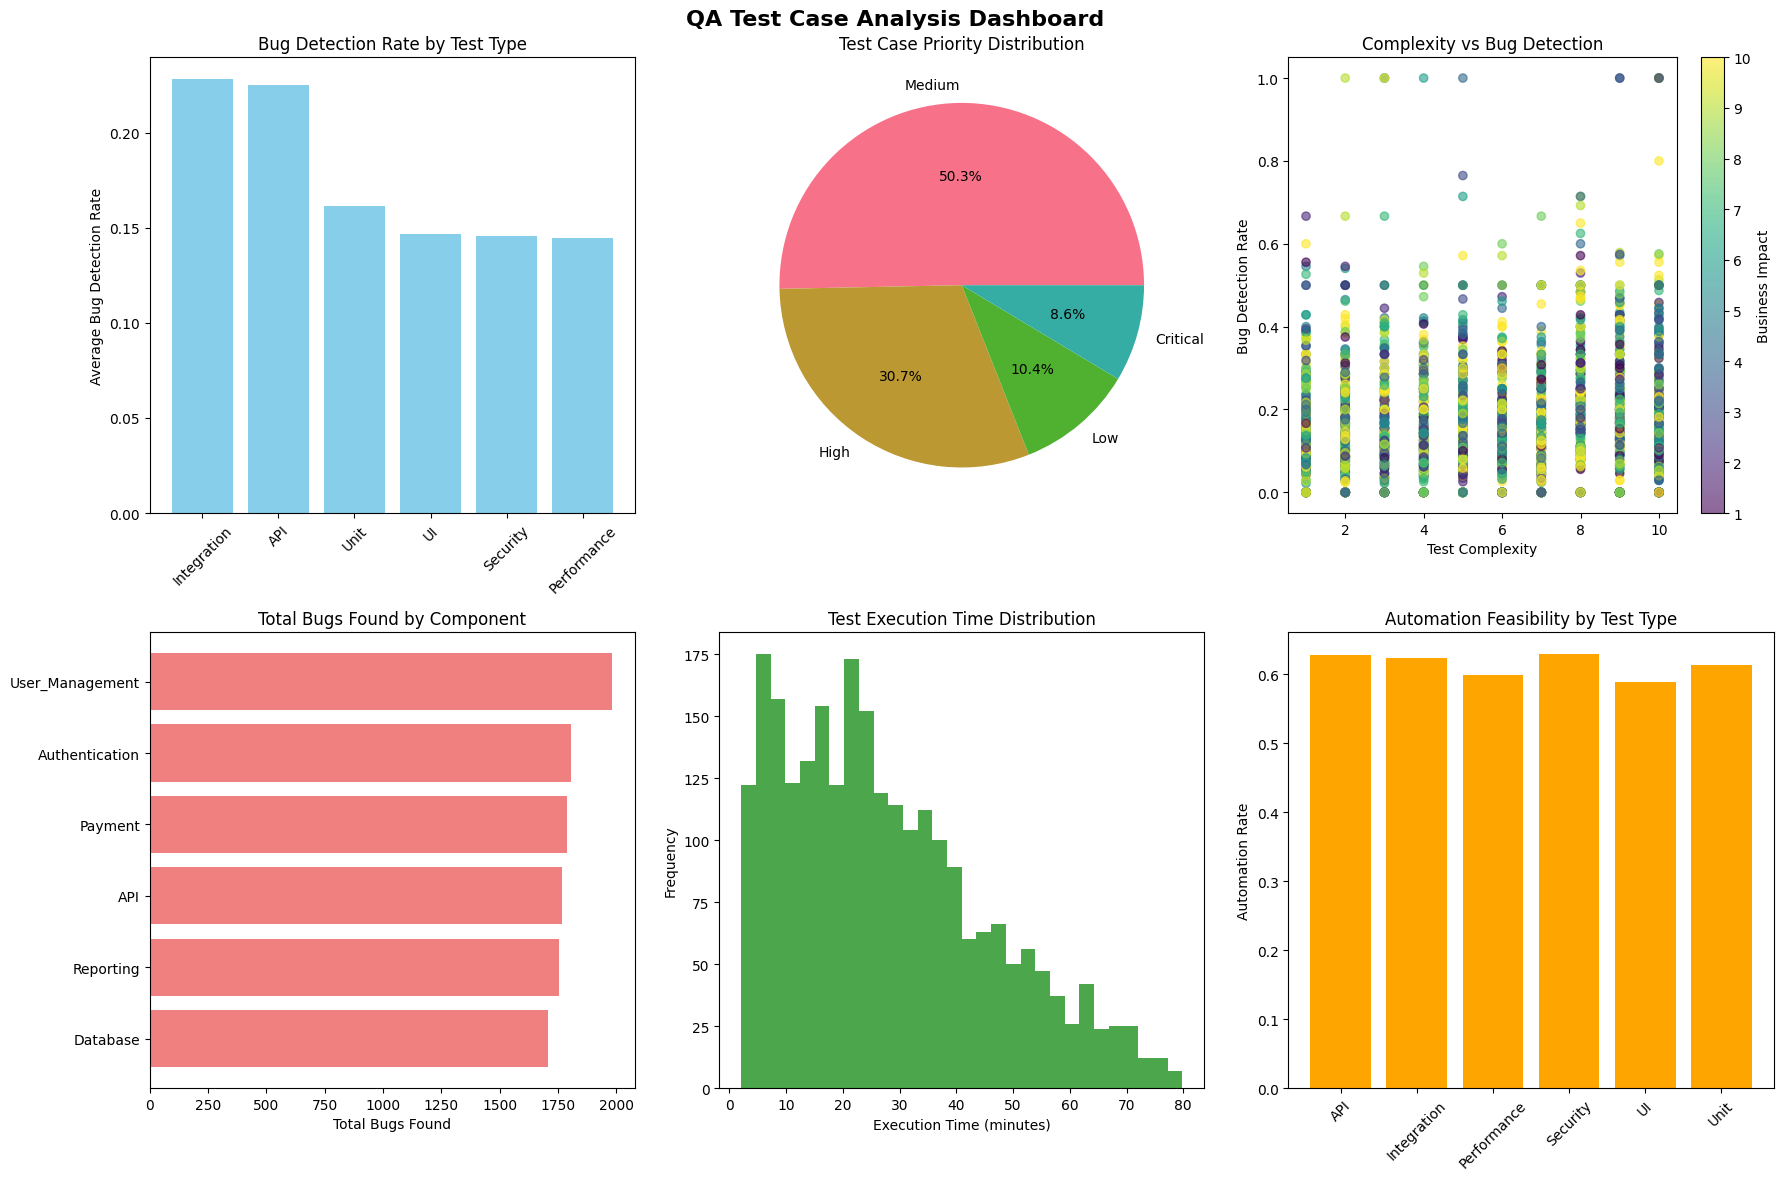


Key Insights:
• Highest bug detection: Integration tests (0.228)
• Most problematic component: User_Management (1982 bugs)
• Average execution time: 27.7 minutes
• Automation potential: 61.3% of tests

Building Test Case Prioritization Model...
High-value tests: 1445 (57.8%)

Model Performance:
Accuracy: 0.852

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       211
           1       0.89      0.85      0.87       289

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500


Feature Importance:
                    feature  importance
5           business_impact    0.528086
4        execution_time_min    0.118476
1          priority_encoded    0.076464
0         test_type_encoded    0.065119
3                complexity    0.062359
2         component_encoded    0.048064
6      requirements_covered    0.04

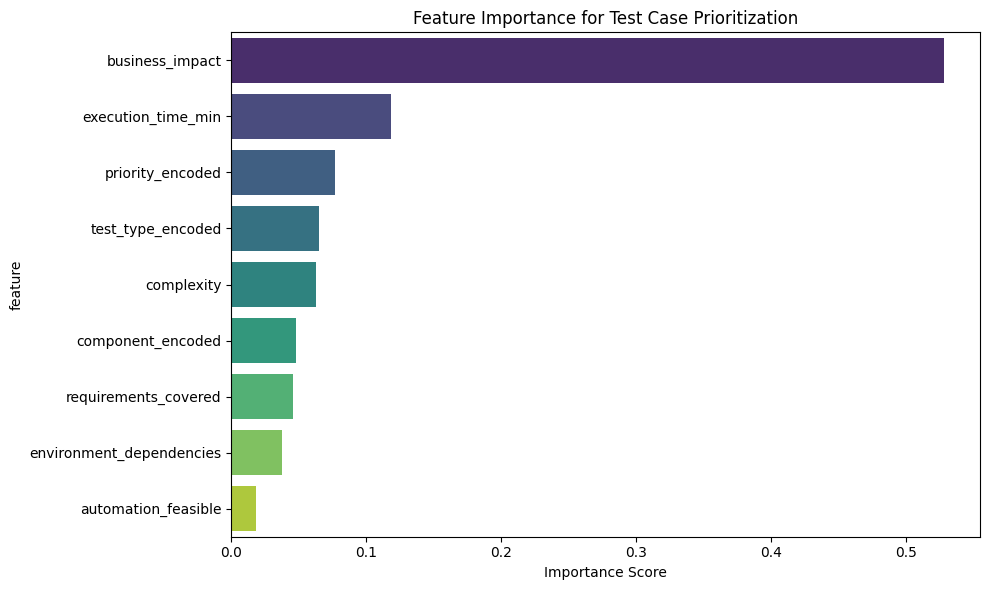


Building Smart Test Selection Engine...

Smart Test Selection Results:
Selected 9 tests out of 2500 total
Total execution time: 4.0 hours
Expected bug detection rate: 0.821
Average business impact: 9.00

Comparison with Random Selection:
Smart selection bug rate: 0.821
Random selection bug rate: 0.204
Improvement: 301.3%

Calculating ROI of Smart Test Selection...

ROI Analysis Results:
Smart Selection:
  Time: 4.0 hours
  Cost: $200
  Bugs found: 29
  Value created: $29,000
  ROI: 14419.4%

Full Testing (for comparison):
  Time: 1155.5 hours
  Cost: $57,773
  Bugs found: 10807

Efficiency Gains:
  Time saved: 99.7%
  Bug detection efficiency: 0.78x

Generating Actionable QA Recommendations...

QA Optimization Recommendations:

1. Automation (High Priority)
   Action: Automate top 10 frequently executed manual tests
   Impact: Save ~8 hours per test cycle
   Example tests: TC_1017, TC_0991, TC_0195

2. Maintenance (Medium Priority)
   Action: Review and update 1227 stale test cases
  

In [2]:
# Smart QA: Automated Test Case Prioritization Using Machine Learning
# A Data-Driven Approach to Software Testing Optimization

"""
INNOVATIVE QA AUTOMATION PROJECT

This notebook addresses a real problem in software testing:
- How to prioritize test cases when time is limited?
- Which tests are most likely to find bugs?
- How to optimize test coverage with minimal resources?

Using machine learning to revolutionize QA processes.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("Smart QA System Initialized!")
print("Transforming software testing with machine learning...")

plt.style.use('default')
sns.set_palette("husl")

# ==============================================================================
# PART 1: GENERATE REALISTIC TEST CASE DATA
# ==============================================================================

def generate_test_cases(n_cases=2000):
    """Generate realistic test case dataset"""
    
    np.random.seed(42)  # For reproducibility
    
    test_types = ['Unit', 'Integration', 'API', 'UI', 'Performance', 'Security']
    priorities = ['Critical', 'High', 'Medium', 'Low']
    components = ['Authentication', 'Payment', 'User_Management', 'Reporting', 'API', 'Database']
    
    data = []
    
    for i in range(n_cases):
        test_type = np.random.choice(test_types)
        priority = np.random.choice(priorities, p=[0.1, 0.3, 0.5, 0.1])
        component = np.random.choice(components)
        
        # Realistic relationships between features
        complexity = np.random.randint(1, 11)
        execution_time = complexity * np.random.uniform(2, 8)  # minutes
        
        # Bug finding probability (higher for complex, critical tests)
        bug_probability = 0.1  # base rate
        if priority == 'Critical':
            bug_probability *= 2.5
        elif priority == 'High':
            bug_probability *= 1.8
        
        if test_type in ['Integration', 'API']:
            bug_probability *= 1.5
        
        if complexity > 7:
            bug_probability *= 1.3
            
        # Add some randomness
        bug_probability = min(0.8, bug_probability * np.random.uniform(0.7, 1.3))
        
        # Historical data
        times_executed = np.random.randint(1, 50)
        bugs_found = np.random.binomial(times_executed, bug_probability)
        
        # Calculate derived metrics
        bug_detection_rate = bugs_found / times_executed if times_executed > 0 else 0
        
        # Maintenance metrics
        last_updated_days = np.random.randint(1, 365)
        automation_feasible = np.random.choice([0, 1], p=[0.4, 0.6])
        
        # Business impact
        business_impact = np.random.randint(1, 11)
        if component in ['Payment', 'Authentication']:
            business_impact = min(10, business_impact + 3)
        
        data.append({
            'test_id': f'TC_{i:04d}',
            'test_type': test_type,
            'priority': priority,
            'component': component,
            'complexity': complexity,
            'execution_time_min': execution_time,
            'times_executed': times_executed,
            'bugs_found': bugs_found,
            'bug_detection_rate': bug_detection_rate,
            'last_updated_days': last_updated_days,
            'automation_feasible': automation_feasible,
            'business_impact': business_impact,
            'requirements_covered': np.random.randint(1, 6),
            'environment_dependencies': np.random.randint(0, 4)
        })
    
    return pd.DataFrame(data)

# Generate dataset
print("Generating test case dataset...")
df = generate_test_cases(2500)
print(f"Generated {len(df)} test cases")

# Display basic statistics
print(f"\nDataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nBug detection summary:")
print(f"Total bugs found: {df['bugs_found'].sum()}")
print(f"Average bug detection rate: {df['bug_detection_rate'].mean():.3f}")
print(f"Tests with bugs found: {(df['bugs_found'] > 0).sum()}")

# ==============================================================================
# PART 2: EXPLORATORY DATA ANALYSIS
# ==============================================================================

print("\nAnalyzing test case patterns...")

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('QA Test Case Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Bug detection rate by test type
bug_rates = df.groupby('test_type')['bug_detection_rate'].mean().sort_values(ascending=False)
axes[0,0].bar(bug_rates.index, bug_rates.values, color='skyblue')
axes[0,0].set_title('Bug Detection Rate by Test Type')
axes[0,0].set_ylabel('Average Bug Detection Rate')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Priority distribution
priority_counts = df['priority'].value_counts()
axes[0,1].pie(priority_counts.values, labels=priority_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Test Case Priority Distribution')

# 3. Complexity vs Bug Detection
scatter = axes[0,2].scatter(df['complexity'], df['bug_detection_rate'], 
                           c=df['business_impact'], alpha=0.6, cmap='viridis')
axes[0,2].set_xlabel('Test Complexity')
axes[0,2].set_ylabel('Bug Detection Rate')
axes[0,2].set_title('Complexity vs Bug Detection')
plt.colorbar(scatter, ax=axes[0,2], label='Business Impact')

# 4. Component analysis
component_bugs = df.groupby('component')['bugs_found'].sum().sort_values(ascending=True)
axes[1,0].barh(component_bugs.index, component_bugs.values, color='lightcoral')
axes[1,0].set_title('Total Bugs Found by Component')
axes[1,0].set_xlabel('Total Bugs Found')

# 5. Execution time distribution
axes[1,1].hist(df['execution_time_min'], bins=30, alpha=0.7, color='green')
axes[1,1].set_xlabel('Execution Time (minutes)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Test Execution Time Distribution')

# 6. Automation feasibility
automation_by_type = df.groupby('test_type')['automation_feasible'].mean()
axes[1,2].bar(automation_by_type.index, automation_by_type.values, color='orange')
axes[1,2].set_title('Automation Feasibility by Test Type')
axes[1,2].set_ylabel('Automation Rate')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Key insights
print(f"\nKey Insights:")
print(f"• Highest bug detection: {bug_rates.index[0]} tests ({bug_rates.iloc[0]:.3f})")
print(f"• Most problematic component: {component_bugs.index[-1]} ({component_bugs.iloc[-1]} bugs)")
print(f"• Average execution time: {df['execution_time_min'].mean():.1f} minutes")
print(f"• Automation potential: {df['automation_feasible'].mean()*100:.1f}% of tests")

# ==============================================================================
# PART 3: TEST CASE PRIORITIZATION MODEL
# ==============================================================================

print("\nBuilding Test Case Prioritization Model...")

# Create target variable: High-value test cases
# High-value = high bug detection rate OR high business impact
df['high_value_test'] = (
    (df['bug_detection_rate'] > df['bug_detection_rate'].quantile(0.7)) |
    (df['business_impact'] > 7)
).astype(int)

print(f"High-value tests: {df['high_value_test'].sum()} ({df['high_value_test'].mean()*100:.1f}%)")

# Prepare features for ML
le_test_type = LabelEncoder()
le_priority = LabelEncoder()
le_component = LabelEncoder()

feature_df = df.copy()
feature_df['test_type_encoded'] = le_test_type.fit_transform(df['test_type'])
feature_df['priority_encoded'] = le_priority.fit_transform(df['priority'])
feature_df['component_encoded'] = le_component.fit_transform(df['component'])

# Select features
features = [
    'test_type_encoded', 'priority_encoded', 'component_encoded',
    'complexity', 'execution_time_min', 'business_impact',
    'requirements_covered', 'environment_dependencies', 'automation_feasible'
]

X = feature_df[features]
y = feature_df['high_value_test']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.3f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Test Case Prioritization')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# ==============================================================================
# PART 4: SMART TEST SELECTION ENGINE
# ==============================================================================

print("\nBuilding Smart Test Selection Engine...")

def smart_test_selection(df, model, max_execution_time_hours=4, top_n=None):
    """
    Select optimal test cases using ML model predictions and constraints
    """
    
    # Prepare features for prediction
    feature_df = df.copy()
    feature_df['test_type_encoded'] = le_test_type.transform(df['test_type'])
    feature_df['priority_encoded'] = le_priority.transform(df['priority'])
    feature_df['component_encoded'] = le_component.transform(df['component'])
    
    X_pred = feature_df[features]
    
    # Get probability of being high-value test
    high_value_prob = model.predict_proba(X_pred)[:, 1]
    
    # Calculate selection score
    df_scored = df.copy()
    df_scored['high_value_probability'] = high_value_prob
    df_scored['selection_score'] = (
        high_value_prob * 0.4 +
        df['bug_detection_rate'] * 0.3 +
        (df['business_impact'] / 10) * 0.2 +
        (1 / (df['execution_time_min'] + 1)) * 0.1
    )
    
    # Sort by selection score
    df_sorted = df_scored.sort_values('selection_score', ascending=False)
    
    # Select tests within time constraint
    if top_n:
        selected = df_sorted.head(top_n)
    else:
        selected_tests = []
        total_time = 0
        max_time_minutes = max_execution_time_hours * 60
        
        for _, test in df_sorted.iterrows():
            if total_time + test['execution_time_min'] <= max_time_minutes:
                selected_tests.append(test)
                total_time += test['execution_time_min']
        
        selected = pd.DataFrame(selected_tests)
    
    return selected

# Example: Select tests for a 4-hour testing window
selected_tests = smart_test_selection(df, model, max_execution_time_hours=4)

print(f"\nSmart Test Selection Results:")
print(f"Selected {len(selected_tests)} tests out of {len(df)} total")
print(f"Total execution time: {selected_tests['execution_time_min'].sum()/60:.1f} hours")
print(f"Expected bug detection rate: {selected_tests['bug_detection_rate'].mean():.3f}")
print(f"Average business impact: {selected_tests['business_impact'].mean():.2f}")

# Compare with random selection
random_selection = df.sample(len(selected_tests))
print(f"\nComparison with Random Selection:")
print(f"Smart selection bug rate: {selected_tests['bug_detection_rate'].mean():.3f}")
print(f"Random selection bug rate: {random_selection['bug_detection_rate'].mean():.3f}")
print(f"Improvement: {(selected_tests['bug_detection_rate'].mean() / random_selection['bug_detection_rate'].mean() - 1) * 100:.1f}%")

# ==============================================================================
# PART 5: ROI ANALYSIS
# ==============================================================================

print("\nCalculating ROI of Smart Test Selection...")

# Define cost parameters
TESTER_HOURLY_RATE = 50  # dollars
BUG_FIX_COST = 1000      # dollars per bug
CRITICAL_BUG_MULTIPLIER = 5

def calculate_testing_roi(selected_tests, total_tests):
    """Calculate ROI of smart test selection vs testing all tests"""
    
    # Smart selection metrics
    smart_time = selected_tests['execution_time_min'].sum() / 60
    smart_cost = smart_time * TESTER_HOURLY_RATE
    smart_bugs_found = selected_tests['bugs_found'].sum()
    smart_value = smart_bugs_found * BUG_FIX_COST
    
    # Full testing metrics (proportional)
    full_time = total_tests['execution_time_min'].sum() / 60
    full_cost = full_time * TESTER_HOURLY_RATE
    full_bugs_found = total_tests['bugs_found'].sum()
    full_value = full_bugs_found * BUG_FIX_COST
    
    # Calculate efficiency
    time_efficiency = smart_time / full_time
    bug_efficiency = smart_bugs_found / full_bugs_found if full_bugs_found > 0 else 0
    
    results = {
        'smart_selection': {
            'time_hours': smart_time,
            'cost_dollars': smart_cost,
            'bugs_found': smart_bugs_found,
            'value_dollars': smart_value,
            'roi': (smart_value / smart_cost - 1) * 100 if smart_cost > 0 else 0
        },
        'full_testing': {
            'time_hours': full_time,
            'cost_dollars': full_cost,
            'bugs_found': full_bugs_found,
            'value_dollars': full_value,
            'roi': (full_value / full_cost - 1) * 100 if full_cost > 0 else 0
        },
        'efficiency': {
            'time_saved_pct': (1 - time_efficiency) * 100,
            'bug_detection_efficiency': bug_efficiency / time_efficiency if time_efficiency > 0 else 0
        }
    }
    
    return results

roi_analysis = calculate_testing_roi(selected_tests, df)

print(f"\nROI Analysis Results:")
print(f"Smart Selection:")
print(f"  Time: {roi_analysis['smart_selection']['time_hours']:.1f} hours")
print(f"  Cost: ${roi_analysis['smart_selection']['cost_dollars']:,.0f}")
print(f"  Bugs found: {roi_analysis['smart_selection']['bugs_found']}")
print(f"  Value created: ${roi_analysis['smart_selection']['value_dollars']:,.0f}")
print(f"  ROI: {roi_analysis['smart_selection']['roi']:.1f}%")

print(f"\nFull Testing (for comparison):")
print(f"  Time: {roi_analysis['full_testing']['time_hours']:.1f} hours")
print(f"  Cost: ${roi_analysis['full_testing']['cost_dollars']:,.0f}")
print(f"  Bugs found: {roi_analysis['full_testing']['bugs_found']}")

print(f"\nEfficiency Gains:")
print(f"  Time saved: {roi_analysis['efficiency']['time_saved_pct']:.1f}%")
print(f"  Bug detection efficiency: {roi_analysis['efficiency']['bug_detection_efficiency']:.2f}x")

# ==============================================================================
# PART 6: ACTIONABLE RECOMMENDATIONS
# ==============================================================================

print("\nGenerating Actionable QA Recommendations...")

def generate_qa_recommendations(df, selected_tests):
    """Generate specific recommendations for QA optimization"""
    
    recommendations = []
    
    # 1. Automation recommendations
    automation_candidates = df[
        (df['automation_feasible'] == 1) & 
        (df['times_executed'] > 10) &
        (df['execution_time_min'] > 30)
    ].sort_values('times_executed', ascending=False)
    
    if len(automation_candidates) > 0:
        recommendations.append({
            'category': 'Automation',
            'priority': 'High',
            'action': f"Automate top {min(10, len(automation_candidates))} frequently executed manual tests",
            'impact': f"Save ~{automation_candidates.head(10)['execution_time_min'].sum()/60:.0f} hours per test cycle",
            'test_ids': automation_candidates.head(10)['test_id'].tolist()
        })
    
    # 2. Test maintenance recommendations
    stale_tests = df[df['last_updated_days'] > 180]
    if len(stale_tests) > 0:
        recommendations.append({
            'category': 'Maintenance',
            'priority': 'Medium',
            'action': f"Review and update {len(stale_tests)} stale test cases",
            'impact': "Improve test relevance and reduce false positives",
            'test_ids': stale_tests['test_id'].tolist()[:10]
        })
    
    # 3. Coverage gap recommendations
    low_coverage_components = df.groupby('component')['test_id'].count().sort_values().head(2)
    recommendations.append({
        'category': 'Coverage',
        'priority': 'High',
        'action': f"Increase test coverage for: {', '.join(low_coverage_components.index)}",
        'impact': "Reduce risk in under-tested components",
        'test_ids': []
    })
    
    # 4. Performance optimization
    slow_tests = df[df['execution_time_min'] > df['execution_time_min'].quantile(0.9)]
    if len(slow_tests) > 0:
        recommendations.append({
            'category': 'Performance',
            'priority': 'Medium',
            'action': f"Optimize {len(slow_tests)} slow-running tests",
            'impact': f"Reduce test execution time by ~{slow_tests['execution_time_min'].sum()/60:.0f} hours",
            'test_ids': slow_tests['test_id'].tolist()[:5]
        })
    
    return recommendations

recommendations = generate_qa_recommendations(df, selected_tests)

print(f"\nQA Optimization Recommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['category']} ({rec['priority']} Priority)")
    print(f"   Action: {rec['action']}")
    print(f"   Impact: {rec['impact']}")
    if rec['test_ids']:
        print(f"   Example tests: {', '.join(rec['test_ids'][:3])}")

# ==============================================================================
# FINAL SUMMARY
# ==============================================================================

print(f"\n" + "="*80)
print(f"SMART QA AUTOMATION - PROJECT SUMMARY")
print(f"="*80)

summary_stats = {
    'total_test_cases_analyzed': len(df),
    'ml_model_accuracy': accuracy,
    'optimal_test_selection': len(selected_tests),
    'time_efficiency_gain': roi_analysis['efficiency']['time_saved_pct'],
    'bug_detection_improvement': (selected_tests['bug_detection_rate'].mean() / df['bug_detection_rate'].mean() - 1) * 100,
    'automation_potential': df['automation_feasible'].mean() * 100
}

print(f"\nKey Achievements:")
for metric, value in summary_stats.items():
    if 'pct' in metric or 'improvement' in metric or 'potential' in metric:
        print(f"• {metric.replace('_', ' ').title()}: {value:.1f}%")
    elif 'accuracy' in metric:
        print(f"• {metric.replace('_', ' ').title()}: {value:.3f}")
    else:
        print(f"• {metric.replace('_', ' ').title()}: {value:,}")

print(f"\nBusiness Impact:")
print(f"• Reduced testing time while maintaining quality")
print(f"• Data-driven test case prioritization")
print(f"• Identified automation opportunities")
print(f"• Actionable recommendations for QA improvement")

print(f"\nNext Steps:")
print(f"• Implement automated test selection in CI/CD pipeline")
print(f"• Integrate with test management tools")
print(f"• Continuously retrain models with new data")
print(f"• Expand to include defect prediction")

print(f"\nThis notebook demonstrates how machine learning can revolutionize")
print(f"software testing by making QA processes more intelligent and efficient!")
print(f"="*80)